## Trading Algoritmico con Python

### Estrategia con medias moviles

### Extraccion de datos

In [2]:
# importacion de librerias
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

In [3]:
# Eleccion de la compañia
nvda = yf.Ticker('NVDA') # Empresas APPLE Inc.

# Periodo de tiempo que se desea analizar
nvda_historical = nvda.history(start='2022-01-2', end='2024-08-2', interval='1d')

# Creacion de nuevo dataframe c
signals_df = nvda_historical.copy()
signals_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,29.770089,30.664740,29.740134,30.075628,391547000,0.0,0.0
2022-01-04 00:00:00-05:00,30.231395,30.422107,28.306299,29.245882,527154000,0.0,0.0
2022-01-05 00:00:00-05:00,28.905399,29.371697,27.491533,27.562426,498064000,0.0,0.0
2022-01-06 00:00:00-05:00,27.598373,28.395172,27.024240,28.135563,454186000,0.0,0.0
2022-01-07 00:00:00-05:00,28.098614,28.379191,27.016245,27.205959,409939000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,116.190002,116.199997,111.580002,113.059998,293399100,0.0,0.0
2024-07-29 00:00:00-04:00,113.690002,116.279999,111.300003,111.589996,248152100,0.0,0.0
2024-07-30 00:00:00-04:00,111.519997,111.989998,102.540001,103.730003,486833300,0.0,0.0


### Establecimiento de señales con medias moviles simples

In [4]:
# Marcos de tiempo
short_window = 50
long_window = 100

# Generacion de las medias moviles
signals_df['SMA_50'] = ta.sma(signals_df['Close'], short_window)
signals_df['SMA_100'] = ta.sma(signals_df['Close'], long_window)
signals_df['Signal'] = 0.0

# Generacion de señales de trading (0 cuando el SMA50 esta debajo de SMA100 y 1 cuando el SMA50 cruza o esta por encima del SMA100)
signals_df['Signal'][short_window:] = np.where(signals_df['SMA_50'][short_window:] > signals_df['SMA_100'][short_window:], 1.0, 0.0)

# Puntos en el tiempo en los que se debe tomar una posicion 1 o -1
signals_df['Entry/Exit'] = signals_df['Signal'].diff()

# Dataframe
signals_df

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24920\927515484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Signal'][short_window:] = np.where(signals_df['SMA_50'][short_window:] > signals_df['SMA_100'][short_window:], 1.0, 0.0)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_100,Signal,Entry/Exit
Date,,,,,,,,,,,
2022-01-03 00:00:00-05:00,29.770089,30.664740,29.740134,30.075628,391547000,0.0,0.0,NaN,NaN,0.0,NaN
2022-01-04 00:00:00-05:00,30.231395,30.422107,28.306299,29.245882,527154000,0.0,0.0,NaN,NaN,0.0,0.0
2022-01-05 00:00:00-05:00,28.905399,29.371697,27.491533,27.562426,498064000,0.0,0.0,NaN,NaN,0.0,0.0
2022-01-06 00:00:00-05:00,27.598373,28.395172,27.024240,28.135563,454186000,0.0,0.0,NaN,NaN,0.0,0.0
2022-01-07 00:00:00-05:00,28.098614,28.379191,27.016245,27.205959,409939000,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,116.190002,116.199997,111.580002,113.059998,293399100,0.0,0.0,118.849688,103.400772,1.0,0.0
2024-07-29 00:00:00-04:00,113.690002,116.279999,111.300003,111.589996,248152100,0.0,0.0,119.189043,103.657102,1.0,0.0
2024-07-30 00:00:00-04:00,111.519997,111.989998,102.540001,103.730003,486833300,0.0,0.0,119.376618,103.807475,1.0,0.0


### Generacion de las señales de trading

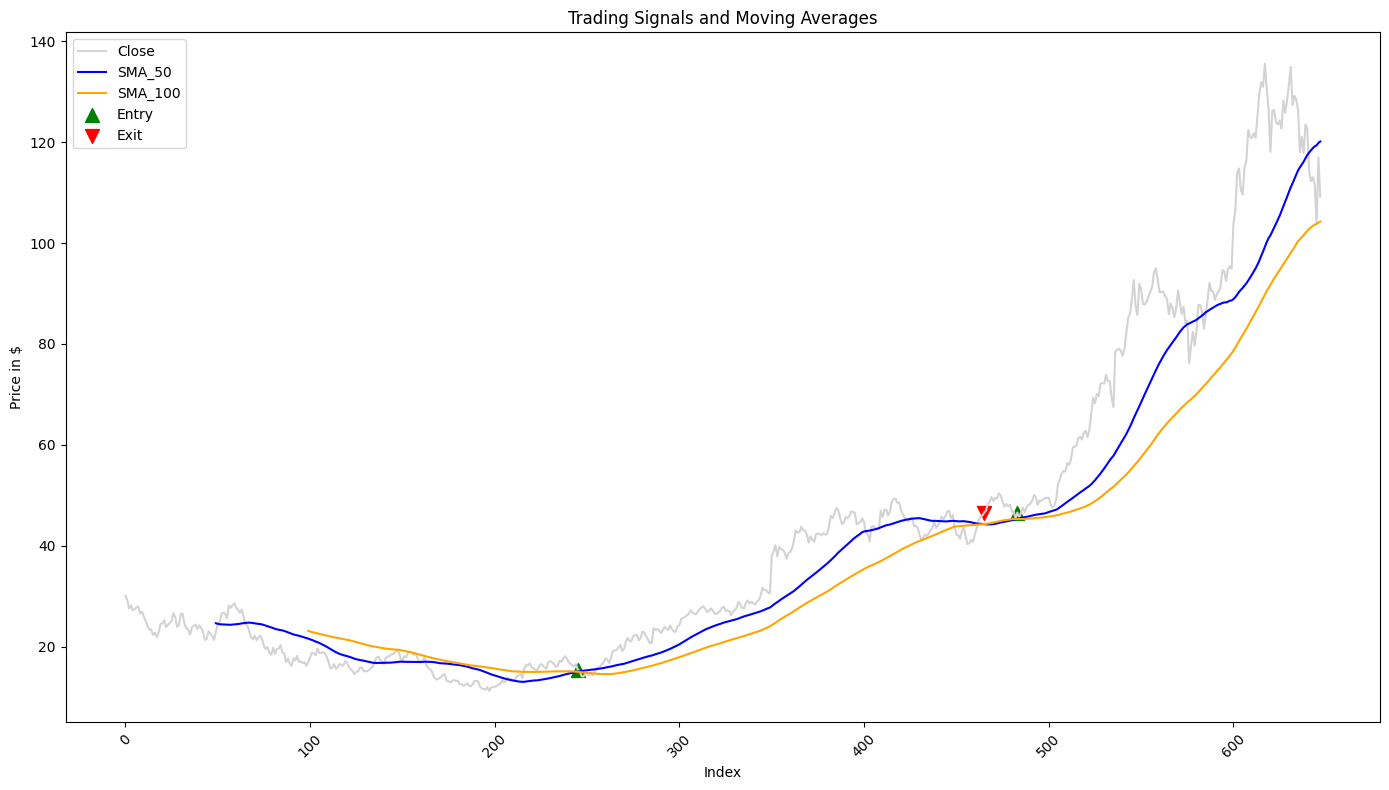

In [5]:
signals_df_copy = signals_df.copy()
signals_df_copy = signals_df_copy.reset_index(drop=True)  # Esto hará que el índice sea una secuencia numérica

# Filtrar datos para puntos de entrada y salida
exit_points = signals_df_copy[signals_df_copy['Entry/Exit'] == -1.0]
entry_points = signals_df_copy[signals_df_copy['Entry/Exit'] == 1.0]

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Visualización del precio de cierre
ax.plot(signals_df_copy.index, signals_df_copy['Close'], color='lightgray', label='Close')

# Visualización de promedios móviles
ax.plot(signals_df_copy.index, signals_df_copy['SMA_50'], color='blue', label='SMA_50')
ax.plot(signals_df_copy.index, signals_df_copy['SMA_100'], color='orange', label='SMA_100')

# Visualización de la posición de entrada
ax.scatter(entry_points.index, entry_points['Close'], color='green', label='Entry', marker='^', s=100)

# Visualización de la posición de salida
ax.scatter(exit_points.index, exit_points['Close'], color='red', label='Exit', marker='v', s=100)

# Configuración del gráfico
ax.set_xlabel('Index')  # O 'Date' si tienes una columna de fechas
ax.set_ylabel('Price in $')
ax.set_title('Trading Signals and Moving Averages')
ax.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si son fechas
plt.tight_layout()  # Ajustar el diseño para que no se corten los elementos

# Mostrar gráfico
plt.show()


### Visualizacion de movimiento de la inversion

In [9]:
# Establecer capital inicial y cantidad de acciones
initial_capital = 10000
share_size = 500

# Posicion larga de 500 acciones cuando ocurra el cruce (SMA50 MAYOR A SMA100)
signals_df['Position'] = share_size * signals_df['Signal']

# Punto del tiempo donde se compra o vende una posicion de 500 acciones
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

# Movimiento de la posicion
signals_df['Portfolio Holdings'] = signals_df['Close'] * signals_df['Entry/Exit Position'].cumsum()

# Cantidad de efectivo liquido
signals_df['Portfolio Cash'] = initial_capital - (signals_df['Close'] * signals_df['Entry/Exit Position']).cumsum()

# Valor total del portafolio
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculo rentabilidad diaria del portafolio
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Rendimientos acumulados
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# Dataframe completo
signals_df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2024-07-19 00:00:00-04:00,120.349998,121.599998,117.370003,117.930000,217223800,0.0,0.0,116.150388,101.572972,1.0,0.0,500.0,0.0,58965.000153,2336.843491,61301.843643,-0.025126,5.130184
2024-07-22 00:00:00-04:00,120.349998,124.070000,119.860001,123.540001,258068900,0.0,0.0,116.813096,102.021463,1.0,0.0,500.0,0.0,61770.000458,2336.843491,64106.843948,0.045757,5.410684
2024-07-23 00:00:00-04:00,122.779999,124.690002,122.099998,122.589996,173911000,0.0,0.0,117.490102,102.470833,1.0,0.0,500.0,0.0,61294.998169,2336.843491,63631.841660,-0.007410,5.363184
2024-07-24 00:00:00-04:00,119.169998,119.949997,113.440002,114.250000,327776900,0.0,0.0,117.977690,102.822316,1.0,0.0,500.0,0.0,57125.000000,2336.843491,59461.843491,-0.065533,4.946184
2024-07-25 00:00:00-04:00,113.040001,116.629997,106.300003,112.279999,460067000,0.0,0.0,118.415458,103.122432,1.0,0.0,500.0,0.0,56139.999390,2336.843491,58476.842880,-0.016565,4.847684
2024-07-26 00:00:00-04:00,116.190002,116.199997,111.580002,113.059998,293399100,0.0,0.0,118.849688,103.400772,1.0,0.0,500.0,0.0,56529.998779,2336.843491,58866.842270,0.006669,4.886684
2024-07-29 00:00:00-04:00,113.690002,116.279999,111.300003,111.589996,248152100,0.0,0.0,119.189043,103.657102,1.0,0.0,500.0,0.0,55794.998169,2336.843491,58131.841660,-0.012486,4.813184
2024-07-30 00:00:00-04:00,111.519997,111.989998,102.540001,103.730003,486833300,0.0,0.0,119.376618,103.807475,1.0,0.0,500.0,0.0,51865.001678,2336.843491,54201.845169,-0.067605,4.420185
2024-07-31 00:00:00-04:00,112.900002,118.339996,110.879997,117.019997,473174200,0.0,0.0,119.867590,104.051061,1.0,0.0,500.0,0.0,58509.998322,2336.843491,60846.841812,0.122597,5.084684
2024-08-01 00:00:00-04:00,117.529999,120.160004,106.809998,109.209999,523462300,0.0,0.0,120.156346,104.267953,1.0,0.0,500.0,0.0,54604.999542,2336.843491,56941.843033,-0.064178,4.694184


### Calculo de indicadores y Backtesting

In [7]:
class SMACross(Strategy):

    def init(self):
        price = self.data.Close
        self.sma50 = self.I(SMA, price, 50)
        self.sma100 = self.I(SMA, price, 100)
    
    def next(self):
        if crossover(self.sma50, self.sma100):
            self.buy()
        elif crossover(self.sma50, self.sma100):
            self.close()


backtest = Backtest(signals_df, SMACross, commission = .002, exclusive_orders=True)
stats = backtest.run()
print(stats)
   
backtest.plot()

Start                     2022-01-03 00:00...
End                       2024-08-01 00:00...
Duration                    940 days 23:00:00
Exposure Time [%]                   62.037037
Equity Final [$]                 77016.711309
Equity Peak [$]                  88839.463308
Return [%]                         670.167113
Buy & Hold Return [%]              263.117931
Return (Ann.) [%]                  121.198941
Volatility (Ann.) [%]               93.212512
Sharpe Ratio                         1.300243
Sortino Ratio                        5.623496
Calmar Ratio                          5.16124
Max. Drawdown [%]                  -23.482525
Avg. Drawdown [%]                   -5.319189
Max. Drawdown Duration       76 days 00:00:00
Avg. Drawdown Duration       14 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                     210.224174
Worst Trade [%]                    148.460347
Avg. Trade [%]                    

c:\Users\Gabriel\AppData\Local\Programs\Python\Python38\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Gabriel\AppData\Local\Programs\Python\Python38\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p1512', ...)

### Estrategia con el indicador Ichimoku

### Extraccion de datos

In [2]:
# importacion de librerias
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy

c:\Users\Gabriel\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# Elección de la compañía
aapl = yf.Ticker('AAPL')

# Período de tiempo que se desea analizar
aapl_historical = aapl.history(start='2018-01-02', end='2019-01-02', interval='1d')

# Creación del DataFrame
signals_df = aapl_historical.copy()

signals_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,40.074355,40.578346,39.862394,40.568924,102223600,0.0,0.0
2018-01-03 00:00:00-05:00,40.632524,41.108255,40.498285,40.561871,118071600,0.0,0.0
2018-01-04 00:00:00-05:00,40.634885,40.853911,40.526552,40.750286,89738400,0.0,0.0
2018-01-05 00:00:00-05:00,40.846839,41.301371,40.754990,41.214233,94640000,0.0,0.0
2018-01-08 00:00:00-05:00,41.061146,41.357887,40.962228,41.061146,82271200,0.0,0.0
...,...,...,...,...,...,...,...
2018-12-24 00:00:00-05:00,35.414606,36.227363,35.041695,35.099068,148676800,0.0,0.0
2018-12-26 00:00:00-05:00,35.450467,37.585143,35.072775,37.570801,234330000,0.0,0.0
2018-12-27 00:00:00-05:00,37.252869,37.475184,35.873579,37.326973,212468400,0.0,0.0


### Establecimiento de señales con la nube ichimoku

In [45]:
# Uso del indicador Ichimoku
# Ajuste de los valores para el cálculo del indicador
TS = 9    # Periodo Tenkan-sen
KS = 26   # Periodo Kijun-sen
SS = 52   # Periodo Senkou Span
CS = 26   # Periodo Chikou Span
OS = 0    # Offset

# Calcula los valores del indicador Ichimoku y creación de columnas
ichimoku_values = ta.ichimoku(
    high=signals_df['High'], 
    low=signals_df['Low'], 
    close=signals_df['Close'], 
    tenkan=TS, 
    kijun=KS, 
    senkou=SS, 
    offset=OS
)

signals_df['Tenkan'] = ichimoku_values[0][f'ITS_{TS}']
signals_df['Kijun'] = ichimoku_values[0][f'IKS_{KS}']
signals_df['SenkanA'] = ichimoku_values[0][f'ISA_{TS}']
signals_df['SenkanB'] = ichimoku_values[0][f'ISB_{KS}']
signals_df['Chikou'] = ichimoku_values[0][f'ICS_{KS}']

# Generación de las señales
signals_df['Signal'] = np.where(
    (signals_df['Close'] > signals_df['SenkanA']) & (signals_df['Close'] > signals_df['SenkanB']), 
    1.0,  # Señal de compra
    np.where(
        (signals_df['Close'] < signals_df['SenkanA']) & (signals_df['Close'] < signals_df['SenkanB']),
        0.0,  # Señal de venta
        np.nan  # No asignar señal cuando el precio está entre SenkanA y SenkanB
    )
)

# Llenar NaN con el valor anterior
signals_df['Signal'] = signals_df['Signal'].fillna(method='ffill')

# Puntos en el tiempo en los que se debe tomar una posición 1 o -1
signals_df['Entry/Exit'] = signals_df['Signal'].diff()

# Filtrar para obtener solo las señales de entrada y salida
signals_df['Entry/Exit'] = signals_df['Entry/Exit'].replace({0: np.nan, 1: 1, -1: -1})

signals_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tenkan,Kijun,SenkanA,SenkanB,Chikou,Signal,Entry/Exit
Date,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.074355,40.578346,39.862394,40.568924,102223600,0.0,0.0,NaN,NaN,NaN,NaN,36.539349,NaN,NaN
2018-01-03 00:00:00-05:00,40.632524,41.108255,40.498285,40.561871,118071600,0.0,0.0,NaN,NaN,NaN,NaN,36.986286,NaN,NaN
2018-01-04 00:00:00-05:00,40.634885,40.853911,40.526552,40.750286,89738400,0.0,0.0,NaN,NaN,NaN,NaN,38.476055,NaN,NaN
2018-01-05 00:00:00-05:00,40.846839,41.301371,40.754990,41.214233,94640000,0.0,0.0,NaN,NaN,NaN,NaN,38.861492,NaN,NaN
2018-01-08 00:00:00-05:00,41.061146,41.357887,40.962228,41.061146,82271200,0.0,0.0,NaN,NaN,NaN,NaN,39.577995,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24 00:00:00-05:00,35.414606,36.227363,35.041695,35.099068,148676800,0.0,0.0,38.146904,40.824213,48.426466,50.030842,NaN,0.0,NaN
2018-12-26 00:00:00-05:00,35.450467,37.585143,35.072775,37.570801,234330000,0.0,0.0,38.146904,40.824213,48.133648,50.030842,NaN,0.0,NaN
2018-12-27 00:00:00-05:00,37.252869,37.475184,35.873579,37.326973,212468400,0.0,0.0,37.729766,40.313848,48.133648,50.030842,NaN,0.0,NaN


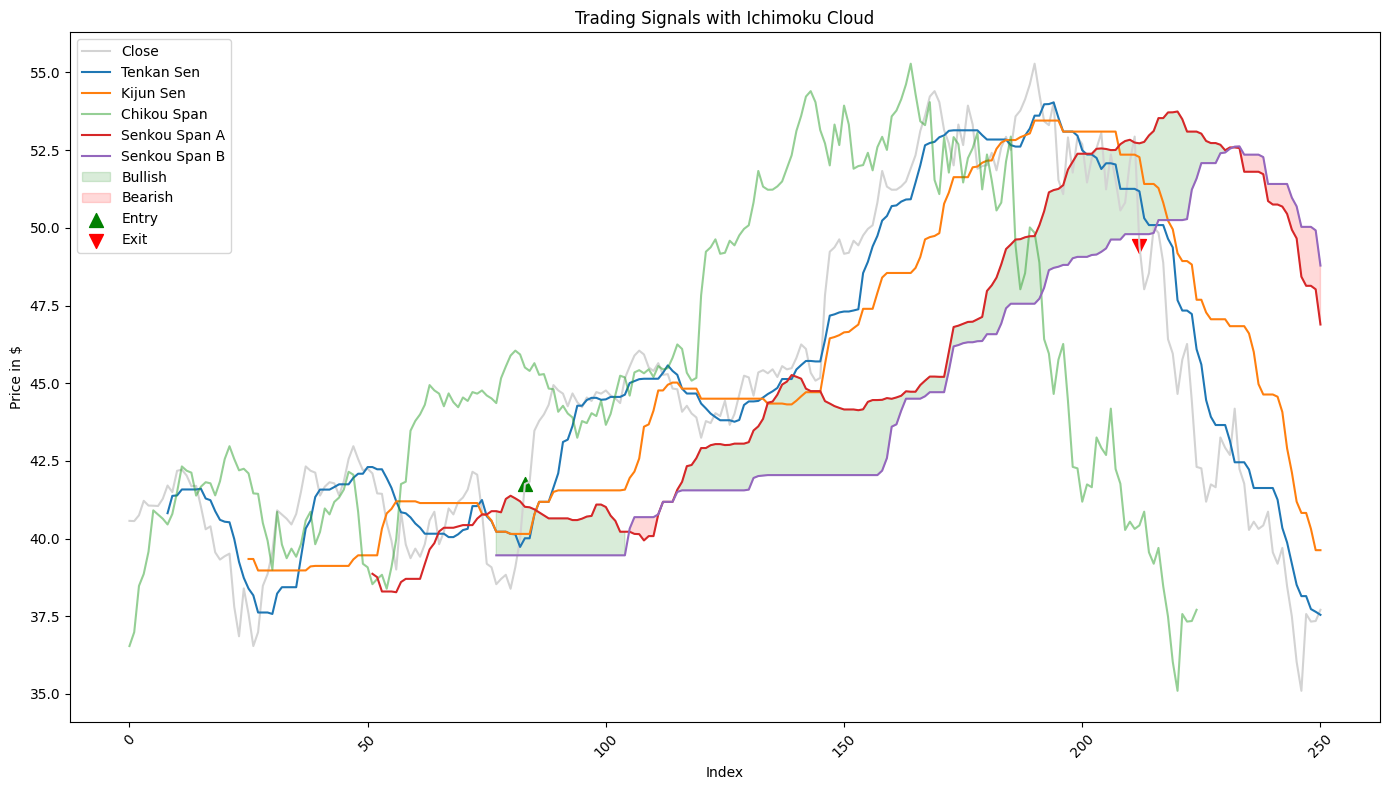

In [46]:
# DataFrame resultante
signals_df_copy = signals_df.copy()
signals_df_copy = signals_df_copy.reset_index(drop=True)  # Hace que el índice sea una secuencia numérica

# Filtrar datos para puntos de entrada y salida
exit_points = signals_df_copy[signals_df_copy['Entry/Exit'] == -1.0]
entry_points = signals_df_copy[signals_df_copy['Entry/Exit'] == 1.0]

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Visualización del precio de cierre
ax.plot(signals_df_copy.index, signals_df_copy['Close'], color='lightgray', label='Close')

# Visualización de la nube Ichimoku
ax.plot(signals_df_copy.index, signals_df_copy['Tenkan'], label='Tenkan Sen')
ax.plot(signals_df_copy.index, signals_df_copy['Kijun'], label='Kijun Sen')
ax.plot(signals_df_copy.index, signals_df_copy['Chikou'], label='Chikou Span', alpha=0.5)
ax.plot(signals_df_copy.index, signals_df_copy['SenkanA'], label='Senkou Span A')
ax.plot(signals_df_copy.index, signals_df_copy['SenkanB'], label='Senkou Span B')

# Relleno de la nube Ichimoku
ax.fill_between(signals_df_copy.index, signals_df_copy['SenkanA'], signals_df_copy['SenkanB'], 
                where=(signals_df_copy['SenkanA'] >= signals_df_copy['SenkanB']), 
                color='green', alpha=0.15, label='Bullish')
ax.fill_between(signals_df_copy.index, signals_df_copy['SenkanA'], signals_df_copy['SenkanB'], 
                where=(signals_df_copy['SenkanA'] <= signals_df_copy['SenkanB']), 
                color='red', alpha=0.15, label='Bearish')

# Visualización de la posición de entrada
ax.scatter(entry_points.index, entry_points['Close'], color='green', label='Entry', marker='^', s=100)

# Visualización de la posición de salida
ax.scatter(exit_points.index, exit_points['Close'], color='red', label='Exit', marker='v', s=100)

# Configuración del gráfico
ax.set_xlabel('Index')  # O 'Date' si tienes una columna de fechas
ax.set_ylabel('Price in $')
ax.set_title('Trading Signals with Ichimoku Cloud')
ax.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si son fechas
plt.tight_layout()  # Ajustar el diseño para que no se corten los elementos

# Mostrar gráfico
plt.show()
